# Import Required Libraries
Import the necessary libraries, including Pandas, Matplotlib, Seaborn, and Plotly.

In [12]:
# Import the necessary libraries for data processing and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set the visualisation style for seaborn
sns.set(style="whitegrid")

# Load Dataset
Load the dataset from the provided Kaggle link.

In [13]:
# Load the dataset from the provided Kaggle link
movies_df = pd.read_csv('top_rated_9000_movies_on_TMDB.csv')

# Display the first few rows of the dataset to verify loading
movies_df.head()

,id,title,original_language,release_date,vote_average,vote_count,popularity,overview,genre_ids,Genres
0,278,The Shawshank Redemption,en,1994-09-23,8.706,26840,150.307,Imprisoned in the 1940s for the double murder ...,"[18, 80]","['Drama', 'Crime']"
1,238,The Godfather,en,1972-03-14,8.690,20373,122.973,"Spanning the years 1945 to 1955, a chronicle o...","[18, 80]","['Drama', 'Crime']"
2,240,The Godfather Part II,en,1974-12-20,8.575,12291,94.204,In the continuing saga of the Corleone crime f...,"[18, 80]","['Drama', 'Crime']"
3,424,Schindler's List,en,1993-12-15,8.565,15695,74.615,The true story of how businessman Oskar Schind...,"[18, 36, 10752]","['Drama', 'History', 'War']"
4,389,12 Angry Men,en,1957-04-10,8.546,8522,54.678,The defense and the prosecution have rested an...,[18],['Drama']


# Data Cleaning
Preprocess the data to handle missing values, outliers, and duplicates.

In [14]:
# Check for missing values in the dataset
movies_df.isnull().sum()

# Handle missing values by filling them with appropriate values or dropping rows/columns
# For simplicity, let's fill missing numeric values with the mean and categorical values with the mode
numeric_columns = movies_df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = movies_df.select_dtypes(include=['object']).columns

movies_df[numeric_columns] = movies_df[numeric_columns].fillna(movies_df[numeric_columns].mean())
movies_df[categorical_columns] = movies_df[categorical_columns].fillna(movies_df[categorical_columns].mode().iloc[0])

# Verify that there are no more missing values
movies_df.isnull().sum()

# Check for duplicates in the dataset
duplicates = movies_df.duplicated().sum()

# Drop duplicate rows if any
movies_df = movies_df.drop_duplicates()

# Verify that duplicates are removed
duplicates_after = movies_df.duplicated().sum()

# Display the cleaned dataset
movies_df.head()

,id,title,original_language,release_date,vote_average,vote_count,popularity,overview,genre_ids,Genres
0,278,The Shawshank Redemption,en,1994-09-23,8.706,26840,150.307,Imprisoned in the 1940s for the double murder ...,"[18, 80]","['Drama', 'Crime']"
1,238,The Godfather,en,1972-03-14,8.690,20373,122.973,"Spanning the years 1945 to 1955, a chronicle o...","[18, 80]","['Drama', 'Crime']"
2,240,The Godfather Part II,en,1974-12-20,8.575,12291,94.204,In the continuing saga of the Corleone crime f...,"[18, 80]","['Drama', 'Crime']"
3,424,Schindler's List,en,1993-12-15,8.565,15695,74.615,The true story of how businessman Oskar Schind...,"[18, 36, 10752]","['Drama', 'History', 'War']"
4,389,12 Angry Men,en,1957-04-10,8.546,8522,54.678,The defense and the prosecution have rested an...,[18],['Drama']


# Movie Rating Analysis
Analyze the average ratings (vote_average) and identify the highest and lowest rated movies.

Highest Rated Movies:
                            title  vote_average
7984     The Shawshank Redemption         8.706
7125                The Godfather         8.690
7126        The Godfather Part II         8.575
5745             Schindler's List         8.565
6147                Spirited Away         8.537
6881              The Dark Knight         8.516
5053                     Parasite         8.507
7175               The Green Mile         8.507
1975  Dilwale Dulhania Le Jayenge         8.500
3369            Impossible Things         8.500
Lowest Rated Movies:
                              title  vote_average
1063     Birdemic: Shock and Terror         2.200
2127           Dragonball Evolution         2.896
3208              House of the Dead         3.129
1984                 Disaster Movie         3.179
473               Alone in the Dark         3.251
913               Battlefield Earth         3.300
8040  The Star Wars Holiday Special         3.300
3052        Hellraiser: Revel

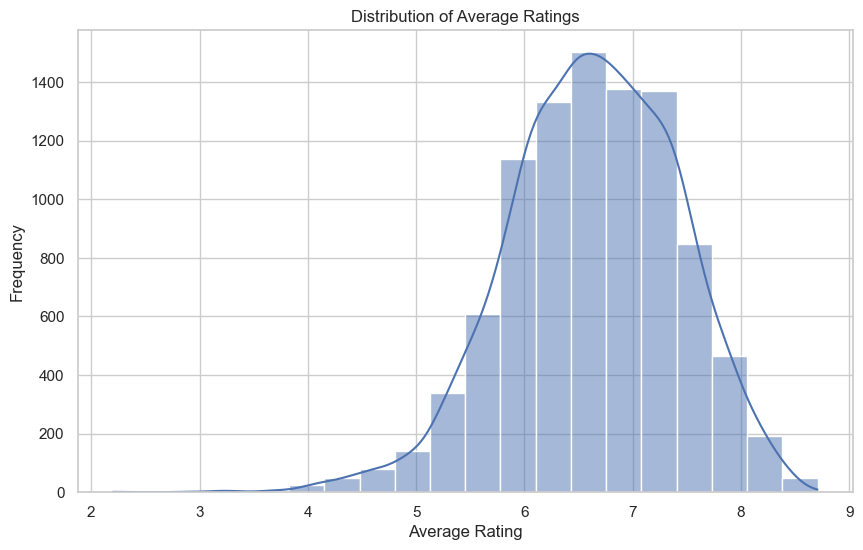

In [15]:
# Movie Rating Analysis

# Calculate the average rating for each movie
average_ratings = movies_df.groupby('title')['vote_average'].mean().reset_index()

# Identify the highest rated movies
highest_rated_movies = average_ratings.sort_values(by='vote_average', ascending=False).head(10)

# Identify the lowest rated movies
lowest_rated_movies = average_ratings.sort_values(by='vote_average').head(10)

# Display the highest rated movies
print("Highest Rated Movies:")
print(highest_rated_movies)

# Display the lowest rated movies
print("Lowest Rated Movies:")
print(lowest_rated_movies)

# Plot the distribution of average ratings
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['vote_average'], bins=20, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# Popularity Analysis
Study the relationship between movie popularity (popularity) and ratings, as well as the number of votes (vote_count).

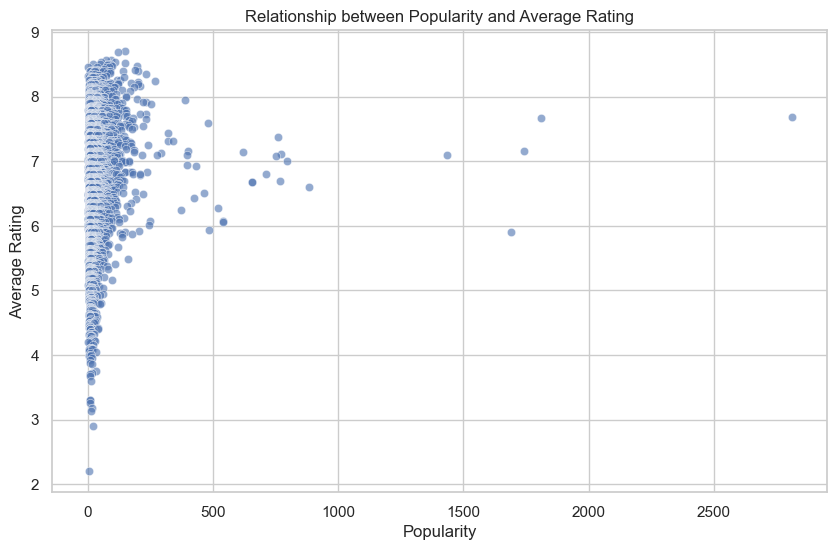

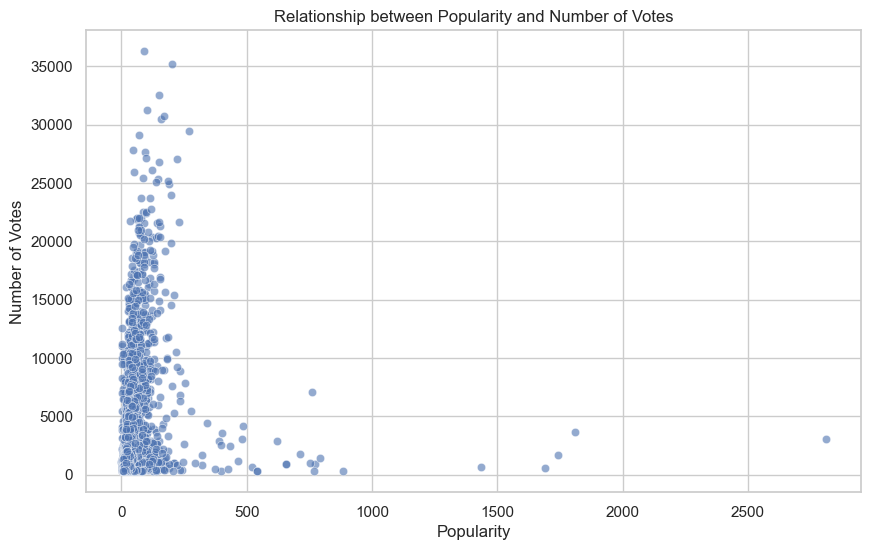

Correlation Matrix:
              popularity  vote_average  vote_count
popularity      1.000000      0.102796    0.239593
vote_average    0.102796      1.000000    0.279729
vote_count      0.239593      0.279729    1.000000


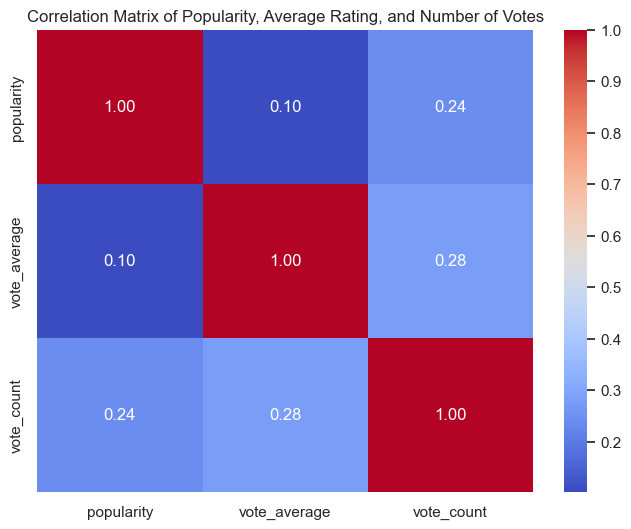

In [16]:
# Popularity Analysis

# Study the relationship between movie popularity and ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_df, x='popularity', y='vote_average', alpha=0.6)
plt.title('Relationship between Popularity and Average Rating')
plt.xlabel('Popularity')
plt.ylabel('Average Rating')
plt.show()

# Study the relationship between movie popularity and number of votes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_df, x='popularity', y='vote_count', alpha=0.6)
plt.title('Relationship between Popularity and Number of Votes')
plt.xlabel('Popularity')
plt.ylabel('Number of Votes')
plt.show()

# Calculate the correlation between popularity, average rating, and number of votes
correlation_matrix = movies_df[['popularity', 'vote_average', 'vote_count']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Popularity, Average Rating, and Number of Votes')
plt.show()

# Genre Analysis
Use genre data (genre_ids) to analyze the ratings and popularity of different movie genres.

Genre Analysis:
             genres  vote_average  popularity
0            Action      6.505385   38.013000
1         Adventure      6.605396   39.696565
2         Animation      7.031811   38.763729
3            Comedy      6.498351   23.880803
4             Crime      6.670280   23.045747
5             Drama      6.890856   19.430202
6            Family      6.664962   35.306084
7           Fantasy      6.652606   37.070521
8           History      7.104821   19.043744
9            Horror      6.177884   27.442334
10            Music      6.879127   17.929452
11          Mystery      6.526320   21.307115
12          Romance      6.718536   20.596410
13  Science Fiction      6.452738   37.191689
14         TV Movie      6.724912   16.465558
15         Thriller      6.435421   25.341039
16              War      7.136885   25.088389
17          Western      6.896307   19.189200


C:\Users\PC\AppData\Local\Temp\ipykernel_18792\2888905699.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_analysis, x='vote_average', y='genres', palette='viridis')


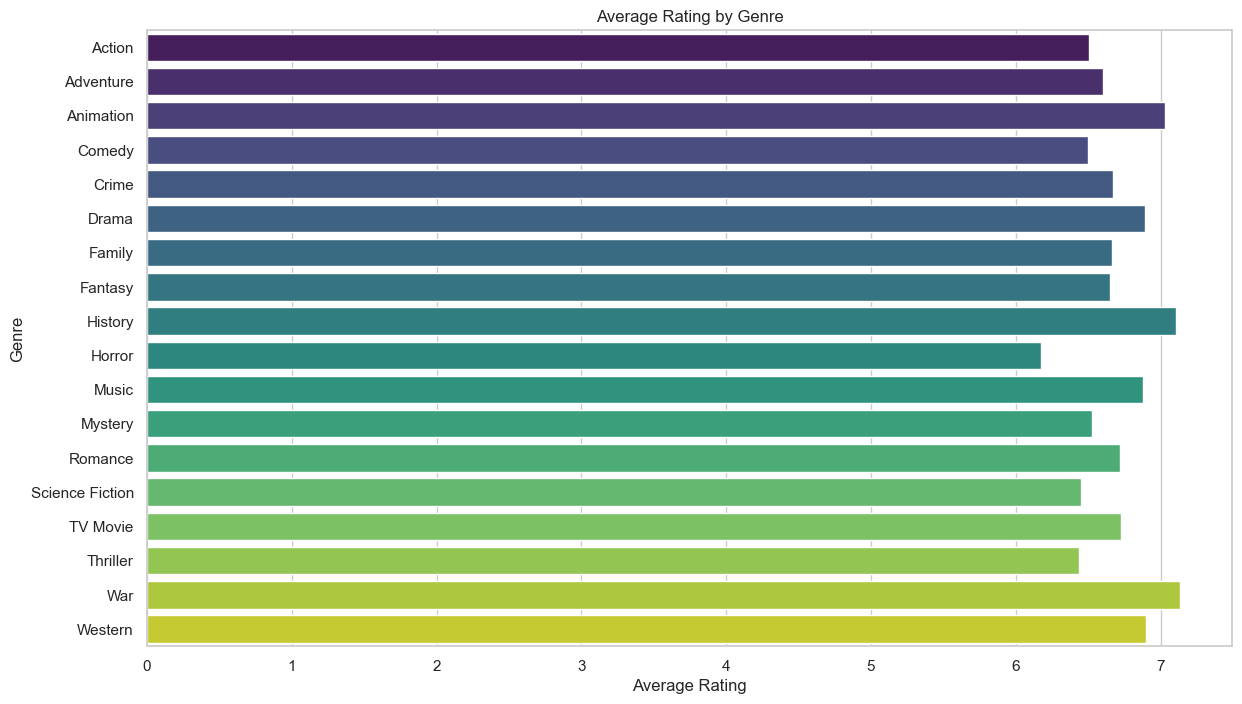

C:\Users\PC\AppData\Local\Temp\ipykernel_18792\2888905699.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_analysis, x='popularity', y='genres', palette='viridis')


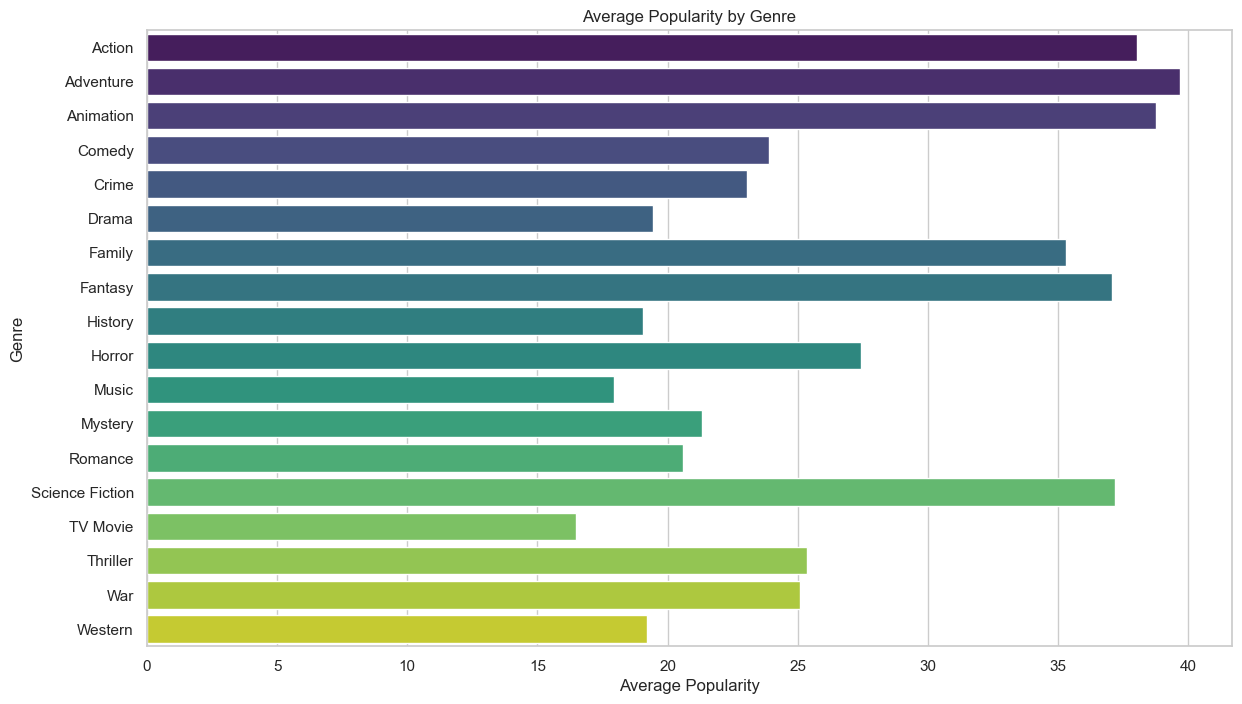

In [17]:
# Genre Analysis

# Extract genre information from the 'genre_ids' column
# Assuming 'genre_ids' is a string of comma-separated genre IDs with square brackets
movies_df['genre_ids'] = movies_df['genre_ids'].apply(lambda x: [int(i) for i in x.strip('[]').split(',')])

# Create a mapping of genre IDs to genre names (example mapping, adjust as needed)
genre_mapping = {
    28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime',
    99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History',
    27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction',
    10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'
}

# Create a new column with genre names
movies_df['genres'] = movies_df['genre_ids'].apply(lambda ids: [genre_mapping.get(i, 'Unknown') for i in ids])

# Explode the genres column to have one genre per row
exploded_movies_df = movies_df.explode('genres')

# Calculate the average rating and popularity for each genre
genre_analysis = exploded_movies_df.groupby('genres').agg({
    'vote_average': 'mean',
    'popularity': 'mean'
}).reset_index()

# Display the genre analysis
print("Genre Analysis:")
print(genre_analysis)

# Plot the average rating for each genre
plt.figure(figsize=(14, 8))
sns.barplot(data=genre_analysis, x='vote_average', y='genres', palette='viridis')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

# Plot the average popularity for each genre
plt.figure(figsize=(14, 8))
sns.barplot(data=genre_analysis, x='popularity', y='genres', palette='viridis')
plt.title('Average Popularity by Genre')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.show()

# Temporal Analysis
Explore trends in movie ratings and popularity across different release years.

Temporal Analysis:
     release_year  vote_average  popularity
0            1902      7.919000   12.065000
1            1903      7.000000    7.767000
2            1915      6.030000   10.808000
3            1916      7.081000    7.869000
4            1918      7.300000    5.188000
..            ...           ...         ...
105          2020      6.679186   17.975848
106          2021      6.822403   27.813003
107          2022      6.817432   34.685953
108          2023      6.905922   65.091060
109          2024      6.754358  347.780235

[110 rows x 3 columns]


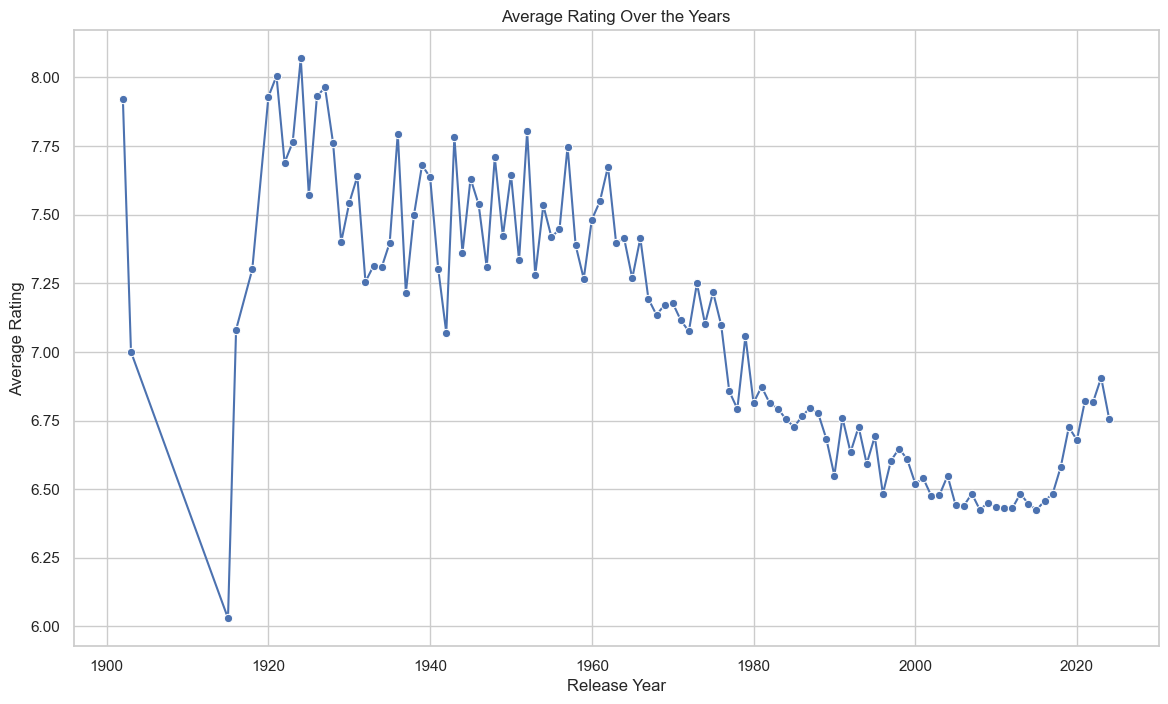

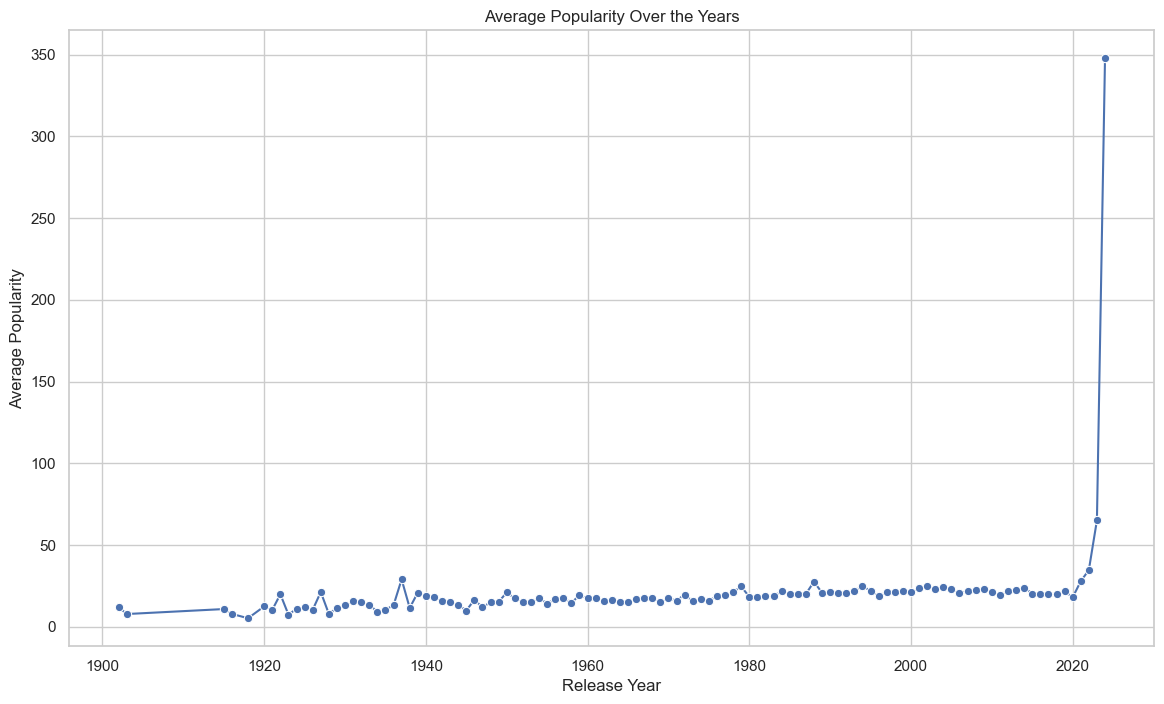

In [18]:
# Temporal Analysis

# Convert the release_date column to datetime format
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

# Extract the release year from the release_date column
movies_df['release_year'] = movies_df['release_date'].dt.year

# Calculate the average rating and popularity for each release year
temporal_analysis = movies_df.groupby('release_year').agg({
    'vote_average': 'mean',
    'popularity': 'mean'
}).reset_index()

# Display the temporal analysis
print("Temporal Analysis:")
print(temporal_analysis)

# Plot the average rating over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=temporal_analysis, x='release_year', y='vote_average', marker='o')
plt.title('Average Rating Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.show()

# Plot the average popularity over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=temporal_analysis, x='release_year', y='popularity', marker='o')
plt.title('Average Popularity Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.show()

# Data Visualization
Visualize the distribution, ratings, and popularity of movies using charts and graphs.

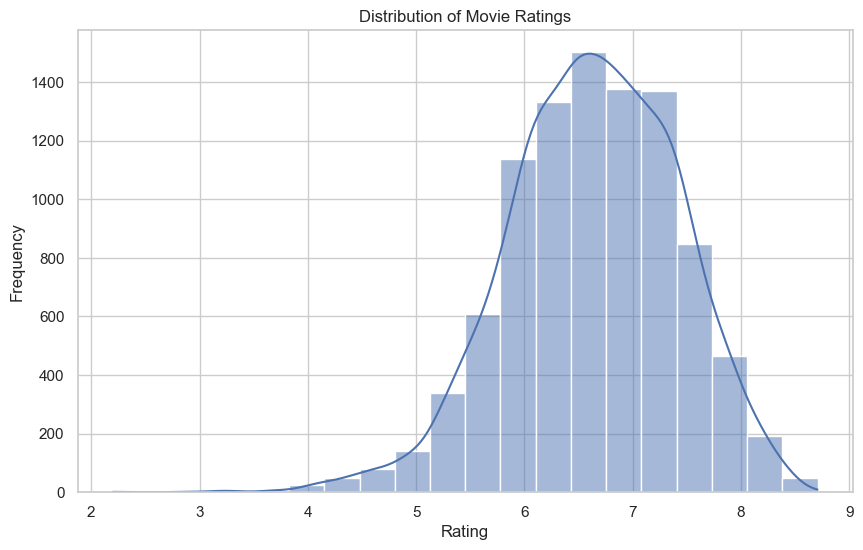

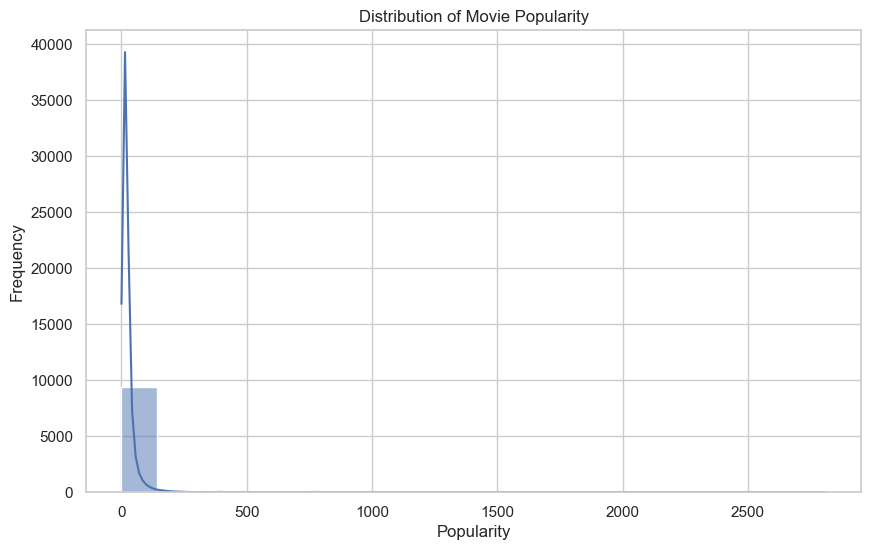

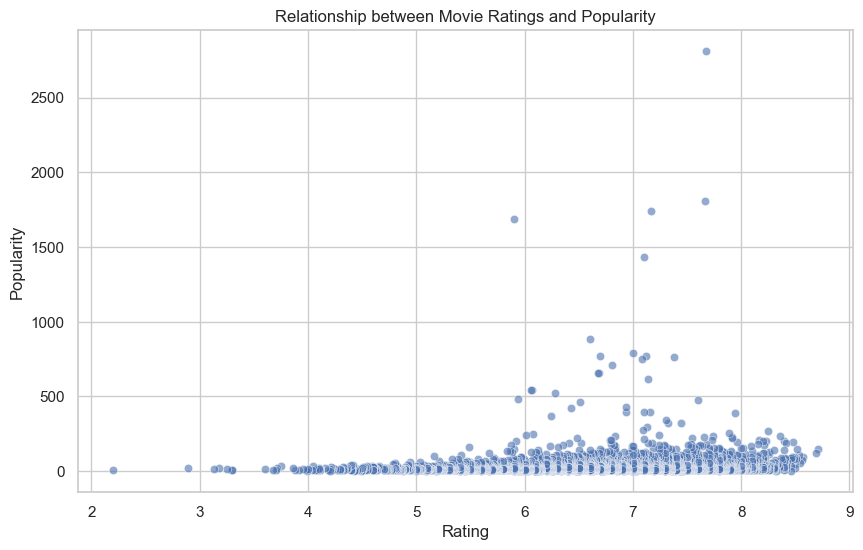

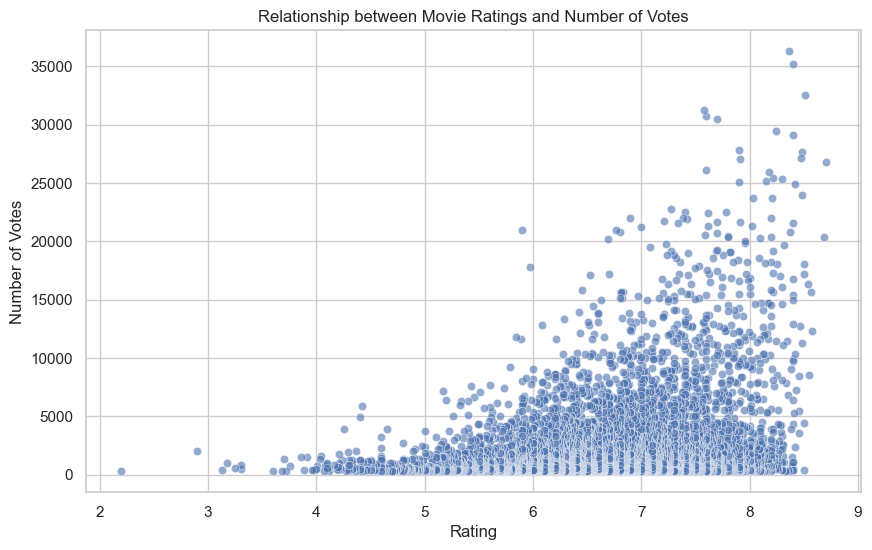

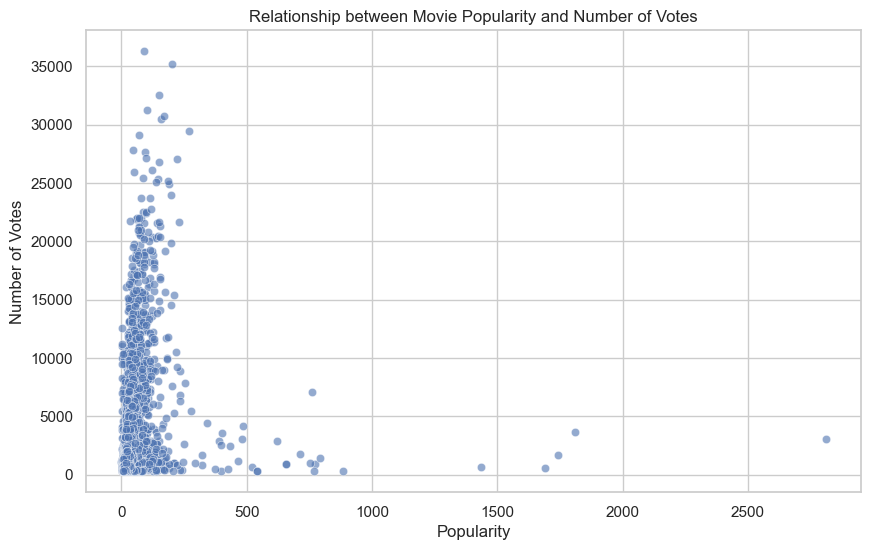

C:\Users\PC\AppData\Local\Temp\ipykernel_18792\2989319884.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_analysis, x='vote_average', y='genres', palette='viridis')


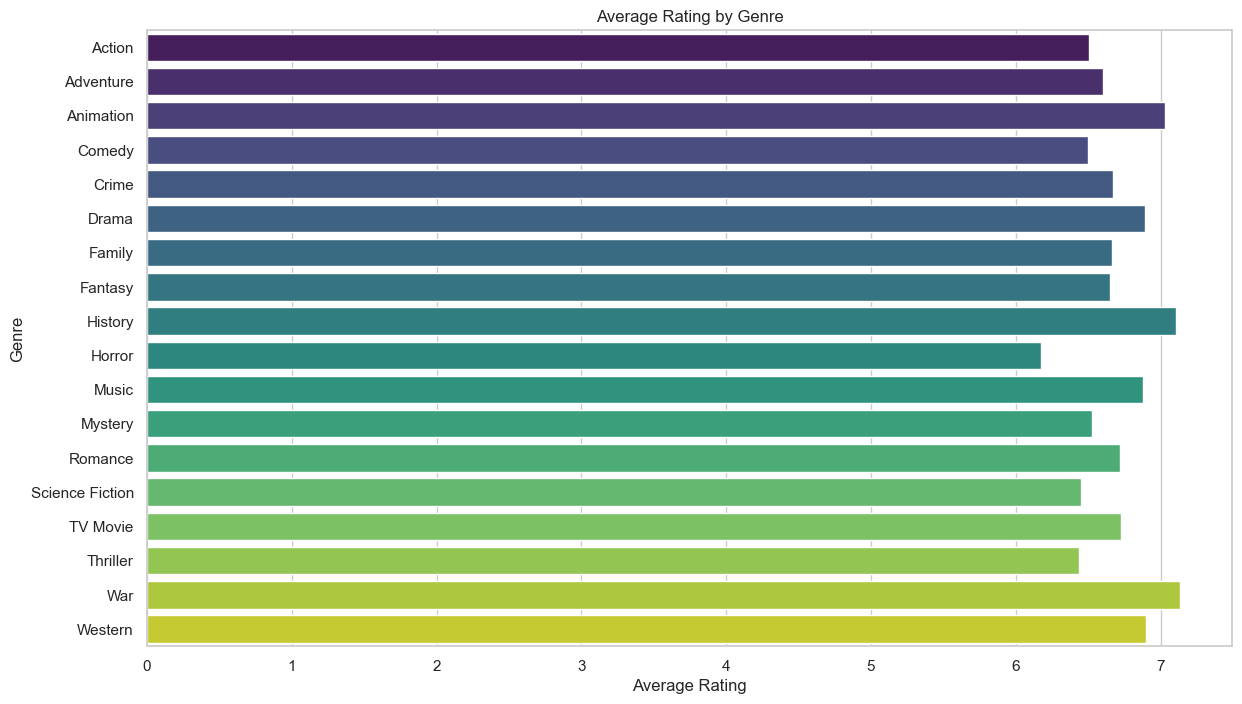

C:\Users\PC\AppData\Local\Temp\ipykernel_18792\2989319884.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_analysis, x='popularity', y='genres', palette='viridis')


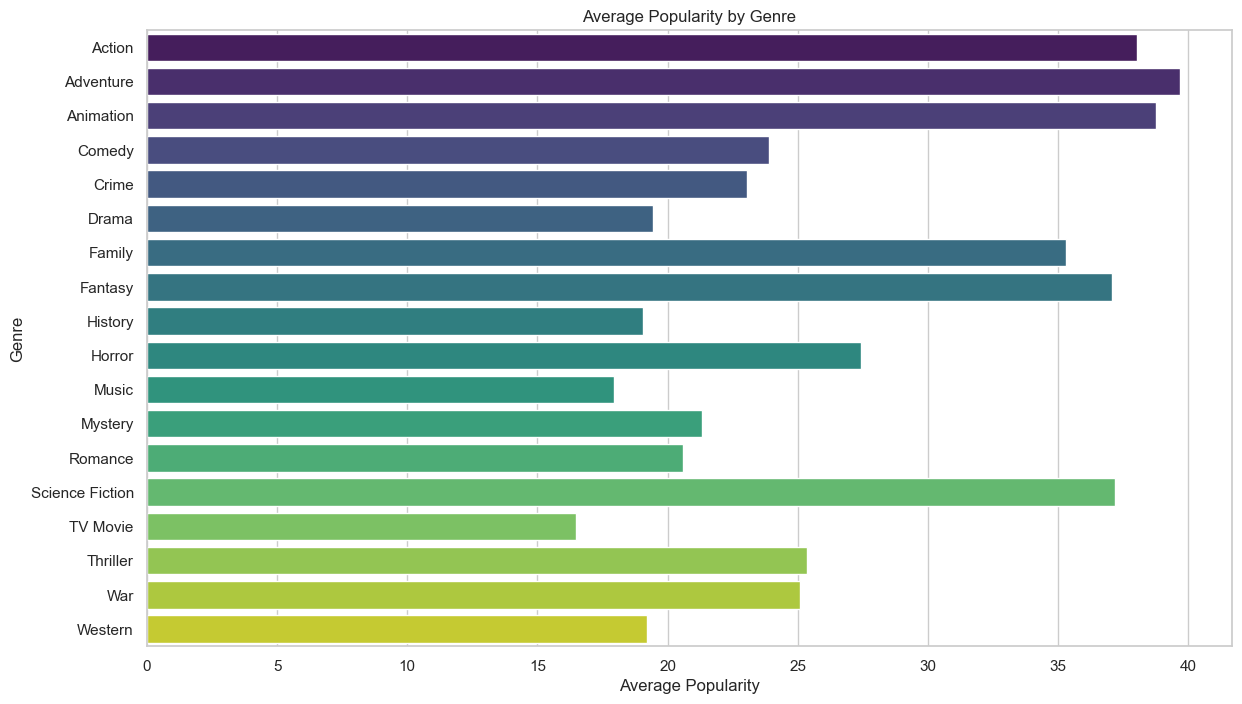

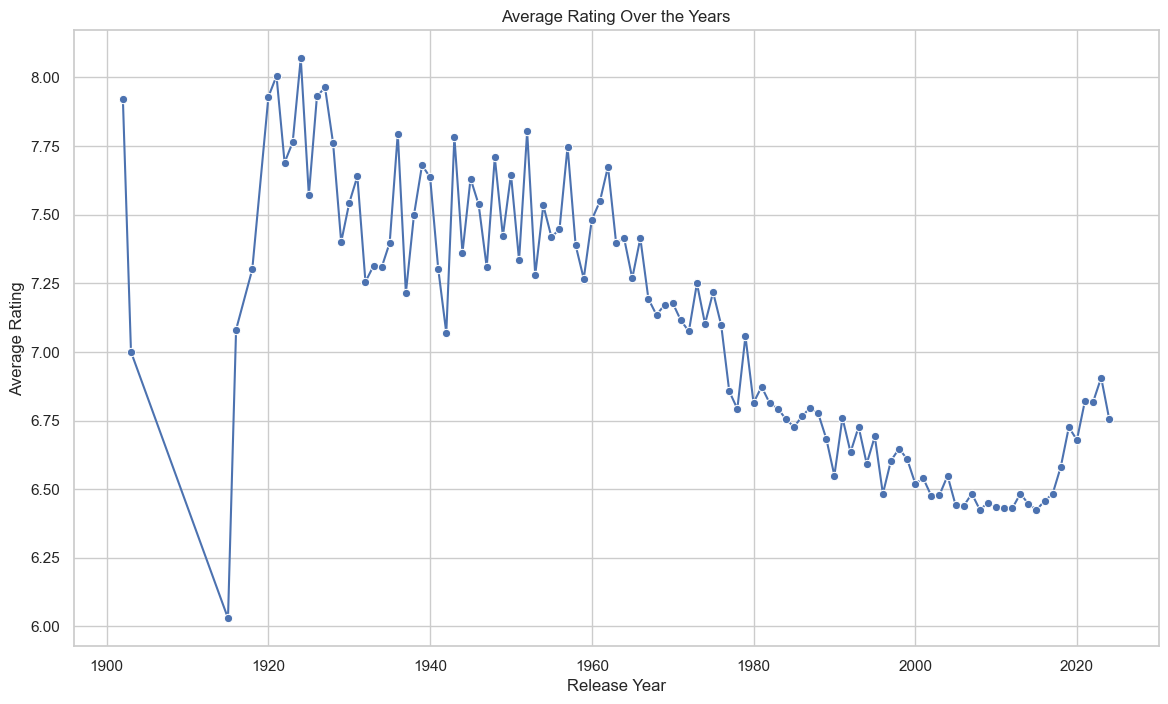

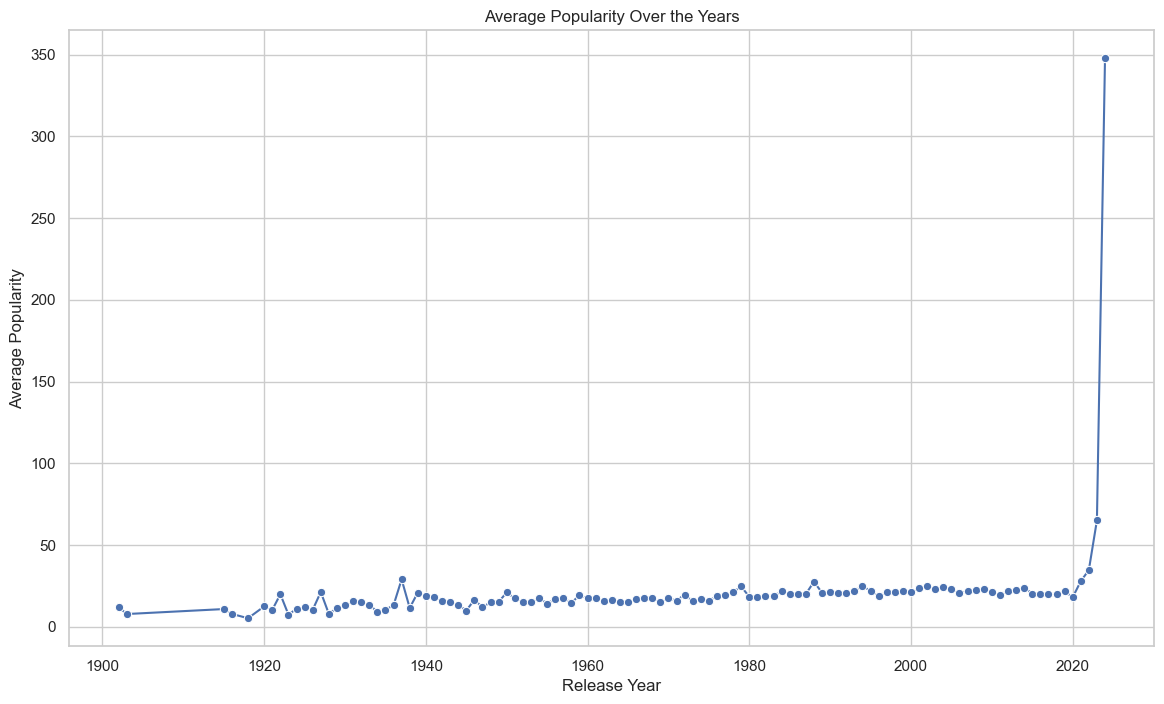

In [19]:
# Data Visualization

# Visualize the distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['vote_average'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of movie popularity
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['popularity'], bins=20, kde=True)
plt.title('Distribution of Movie Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between movie ratings and popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_df, x='vote_average', y='popularity', alpha=0.6)
plt.title('Relationship between Movie Ratings and Popularity')
plt.xlabel('Rating')
plt.ylabel('Popularity')
plt.show()

# Visualize the relationship between movie ratings and number of votes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_df, x='vote_average', y='vote_count', alpha=0.6)
plt.title('Relationship between Movie Ratings and Number of Votes')
plt.xlabel('Rating')
plt.ylabel('Number of Votes')
plt.show()

# Visualize the relationship between movie popularity and number of votes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_df, x='popularity', y='vote_count', alpha=0.6)
plt.title('Relationship between Movie Popularity and Number of Votes')
plt.xlabel('Popularity')
plt.ylabel('Number of Votes')
plt.show()

# Visualize the average rating by genre
plt.figure(figsize=(14, 8))
sns.barplot(data=genre_analysis, x='vote_average', y='genres', palette='viridis')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

# Visualize the average popularity by genre
plt.figure(figsize=(14, 8))
sns.barplot(data=genre_analysis, x='popularity', y='genres', palette='viridis')
plt.title('Average Popularity by Genre')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.show()

# Visualize the average rating over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=temporal_analysis, x='release_year', y='vote_average', marker='o')
plt.title('Average Rating Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.show()

# Visualize the average popularity over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=temporal_analysis, x='release_year', y='popularity', marker='o')
plt.title('Average Popularity Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.show()

# Recommendation System Basics
Attempt to recommend movies to users using a simple algorithm.

In [20]:
# Recommendation System Basics

# Create a simple recommendation system based on movie popularity and average rating

# Define a function to recommend movies based on popularity and average rating
def recommend_movies(df, num_recommendations=10):
    # Sort the movies by popularity and average rating
    recommended_movies = df.sort_values(by=['popularity', 'vote_average'], ascending=False)
    # Select the top N recommended movies
    recommended_movies = recommended_movies.head(num_recommendations)
    return recommended_movies[['title', 'popularity', 'vote_average']]

# Get the top 10 recommended movies
top_recommended_movies = recommend_movies(movies_df, num_recommendations=10)

# Display the recommended movies
print("Top 10 Recommended Movies:")
print(top_recommended_movies)

Top 10 Recommended Movies:
                        title  popularity  vote_average
818      Deadpool & Wolverine    2811.772         7.679
848              Inside Out 2    1809.115         7.667
2557          Despicable Me 4    1743.127         7.166
8028              Borderlands    1689.252         5.906
2766  Beetlejuice Beetlejuice    1434.179         7.100
4972              Blink Twice     884.199         6.600
3314                 Twisters     794.177         7.000
2753       The Garfield Movie     773.751         7.117
4629          It Ends with Us     768.780         6.700
1723              Beetlejuice     761.713         7.376
